# 比較分歧與未分歧的準確率

到底分歧之後是效率比較高，還是準確率比較高呢?

In [1]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact,IntSlider

import time #計算效率

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate, add

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [6]:
print(x_train.shape)

(60000, 28, 28)


In [7]:
x_train1 = x_train.reshape(60000,28*28)

In [8]:
print(x_train1.shape)

(60000, 784)


In [9]:
x_test1 = x_test.reshape(10000,28*28)

In [10]:
x_train1 -= x_train1.min()
x_train1 = x_train1/x_train1.max()
x_test1 -= x_test1.min()
x_test1 = x_test1/x_test1.max()

In [11]:
x_test1.min(), x_test1.max()

(0.0, 1.0)

In [12]:
x_train1.min(), x_train1.max()

(0.0, 1.0)

In [13]:
y_train1 = np_utils.to_categorical(y_train,10)
y_test1 = np_utils.to_categorical(y_test,10)

![model](./模型1.jpg)

In [14]:
x = Input(shape=(784,))

此處activation 改用softplus，為上次作業製作最佳化的結果，此處繼續沿用。

In [15]:
#定義
f_11 = Dense(300, activation='softplus')
f_12= Dense(300, activation='softplus')

f_21 = Dense(150, activation='softplus')
f_22 = Dense(150, activation='softplus')
f_23 = Dense(150, activation='softplus')

f_3 = Dense(50, activation='softplus')

f_4= Dense(10, activation='softmax')

In [16]:
#建立
h_11 = f_11(x)
h_12 = f_12(x)

h_21 = f_21(h_11)
h_22 = f_22(concatenate([h_11,h_12]))
h_23 = f_23(h_12)

h_3 = f_3(concatenate([h_21,h_22,h_23]))

y = f_4(h_3)

In [17]:
model = Model(x, y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 300)          235500      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 300)          235500      input_1[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 600)          0           dense_1[0][0]                    
                                                                 dense_2[0][0]                    
__________

此處使用"mse" 為上一次作業做出最佳的結果，這裡決定繼續沿用

In [18]:
model.compile(loss = "mse",optimizer=SGD(lr = 0.05),metrics=["accuracy"])

In [19]:
t = time.time()
model_fit = model.fit(x_train1, y_train1, batch_size=100, epochs=20)
t1 = time.time()
print(t1-t)

Epoch 1/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0900 - acc: 0.1984
Epoch 2/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.0859 - acc: 0.3623
Epoch 3/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.0784 - acc: 0.4798
Epoch 4/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0610 - acc: 0.6087
Epoch 5/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0432 - acc: 0.7549
Epoch 6/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0323 - acc: 0.8201
Epoch 7/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0262 - acc: 0.8477
Epoch 8/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0228 - acc: 0.8619
Epoch 9/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0207 - acc: 0.8721
Epoch 10/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0192 - a

做未分歧的測試

In [21]:
x_test2 = Input(shape=(784,))
f_1 = Dense(300, activation='softplus')

f_2 = Dense(150, activation='softplus')

f_3 = Dense(50, activation='softplus')

f_4= Dense(10, activation='softmax')

h_1 = f_1(x_test2)

h_2 = f_2(h_1)

h_3 = f_3(h_2)

y_test2 = f_4(h_3)

In [22]:
model2 = Model(x_test2, y_test2)
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_9 (Dense)              (None, 150)               45150     
_________________________________________________________________
dense_10 (Dense)             (None, 50)                7550      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                510       
Total params: 288,710
Trainable params: 288,710
Non-trainable params: 0
_________________________________________________________________


In [23]:
model2.compile(loss = "mse",optimizer=SGD(lr = 0.05),metrics=["accuracy"])

In [24]:
t = time.time()
model2_fit = model2.fit(x_train1, y_train1, batch_size=100, epochs=20)
t1 = time.time()
print(t1-t)

Epoch 1/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.0901 - acc: 0.2324
Epoch 2/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0857 - acc: 0.3377
Epoch 3/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0780 - acc: 0.4358
Epoch 4/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0638 - acc: 0.5953
Epoch 5/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0469 - acc: 0.7179
Epoch 6/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0336 - acc: 0.8155
Epoch 7/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0263 - acc: 0.8494
Epoch 8/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0225 - acc: 0.8655
Epoch 9/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0202 - acc: 0.8763
Epoch 10/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0188 - acc: 0.8829

<function matplotlib.pyplot.show(*args, **kw)>

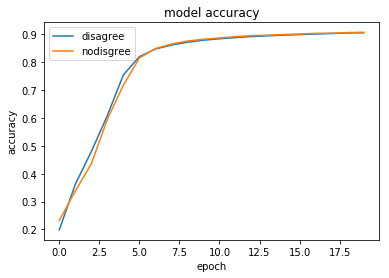

In [25]:
plt.plot(model_fit.history['acc'])
plt.plot(model2_fit.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["disagree","nodisgree"],loc = "best")
plt.show

# 結論

雖然準確率是差不多的

但是效率上是有分歧的需要140秒

無分歧的共花費70秒